In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


### Gaussian low pass filter

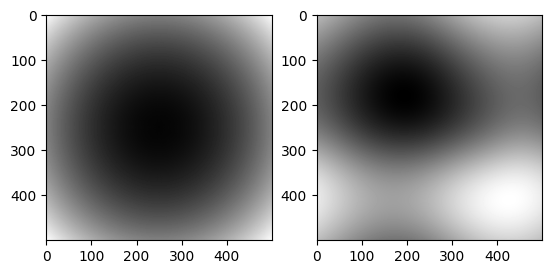

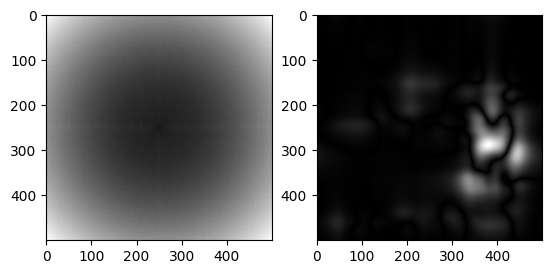

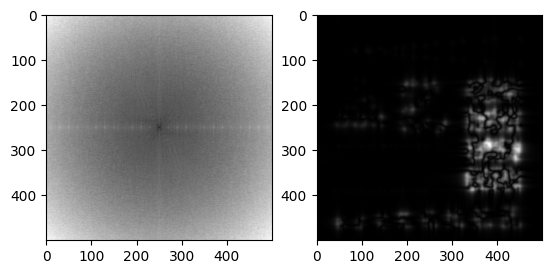

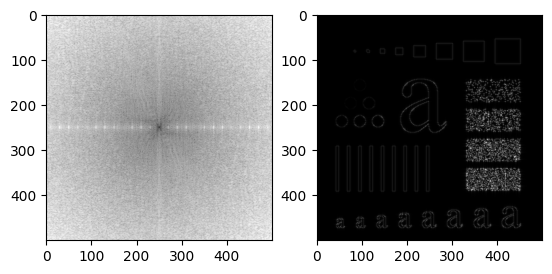

In [58]:
# Gaussian low pass filter 10 30 60 160

def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)


def gaussian(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = np.exp(((distance((y, x), center) ** 2) / (2 * (D0 ** 2))))
    return base



s1 = 500
s2 = 500
v = 10,30,60,160
for i in range(4):

  H = 1 - gaussian(v[i], (s1, s2))
  # Take Fourier transform
  af = np.fft.fftshift(np.fft.fft2(img))
  # Conv filter and mask in frequency mode
  t = af * H

  # Take real part of complex number
  M_Id = np.abs(t)
  # Take log from image
  M_IdLog = np.log(1 + M_Id)
  # Calc max of 2D image
  Max = np.max(np.max(M_IdLog))
  # Plot image
  j = 121
  plt.subplot(j)
  plt.imshow(M_IdLog / Max)
  # Return from frequency to place
  cfli1 = np.fft.ifft2(np.fft.ifftshift(t))
  # Take real part of complex number
  IFFTt = np.abs(cfli1)
  # Calc max of 2D image
  Max2 = np.max(np.max(IFFTt))
  # Plot image
  k = 122 
  plt.subplot(k)
  plt.imshow(IFFTt / Max2)
  plt.show()